In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

data = pd.read_csv('/content/News_Final.csv')

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,4/2/2002 0:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,9/20/2008 0:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,1/28/2012 0:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,3/1/2015 0:06,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,3/1/2015 0:11,0.000000,0.141084,-1,-1,-1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


**Exploratory Data Analysis**

In [6]:
# 1. Handling Missing Values
# Checking for missing values if any
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64


In [7]:
data['Source'].fillna(data['Source'].mode()[0], inplace=True)
data['Headline'].fillna(data['Title'], inplace=True)

<ipython-input-7-f632cb4318ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Source'].fillna(data['Source'].mode()[0], inplace=True)
<ipython-input-7-f632cb4318ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [8]:
# Impute missing values in numerical columns with median values (for engagement metrics)
data['Facebook'].fillna(data['Facebook'].median(), inplace=True)
data['GooglePlus'].fillna(data['GooglePlus'].median(), inplace=True)
data['LinkedIn'].fillna(data['LinkedIn'].median(), inplace=True)

<ipython-input-8-dcf618c181a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Facebook'].fillna(data['Facebook'].median(), inplace=True)
<ipython-input-8-dcf618c181a3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [9]:
# Checking again to confirm that all missing values have been handled
print("\nMissing Values Count After Imputation/Dropping:")
print(data.isnull().sum())


Missing Values Count After Imputation/Dropping:
IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64


In [10]:
# 2. Text Preprocessing
# Defining text preprocessing functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercasing the text
    text = text.lower()
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenizing the text
    words = word_tokenize(text)
    # Removing stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Joinning the words back into a single string
    return ' '.join(words)

In [11]:
# Assuming preprocess_text function is already defined
data['Title'] = data['Title'].astype(str).apply(preprocess_text)
data['Headline'] = data['Headline'].astype(str).apply(preprocess_text)

In [12]:
# 3. Date Preprocessing
# Converting PublishDate to datetime format
data['PublishDate'] = pd.to_datetime(data['PublishDate'], errors='coerce')

# Extracting additional date features (year, month, day, hour)
data['Year'] = data['PublishDate'].dt.year
data['Month'] = data['PublishDate'].dt.month
data['Day'] = data['PublishDate'].dt.day
data['Hour'] = data['PublishDate'].dt.hour

In [13]:
# Dropping rows with invalid PublishDate after conversion (if any)
data = data.dropna(subset=['PublishDate'])

In [14]:
# Displaying processed dataset information until now
print("\nProcessed Dataset Information:")
data.info()


Processed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   IDLink             93239 non-null  float64       
 1   Title              93239 non-null  object        
 2   Headline           93239 non-null  object        
 3   Source             93239 non-null  object        
 4   Topic              93239 non-null  object        
 5   PublishDate        93239 non-null  datetime64[ns]
 6   SentimentTitle     93239 non-null  float64       
 7   SentimentHeadline  93239 non-null  float64       
 8   Facebook           93239 non-null  int64         
 9   GooglePlus         93239 non-null  int64         
 10  LinkedIn           93239 non-null  int64         
 11  Year               93239 non-null  int32         
 12  Month              93239 non-null  int32         
 13  Day                93239 non-

In [15]:
# 4. Preliminary Exploratory Data Analysis (EDA)
# Summary statistics for engagement metrics
print("\nSummary Statistics for Engagement Metrics:")
print(data[['Facebook', 'GooglePlus', 'LinkedIn']].describe())


Summary Statistics for Engagement Metrics:
           Facebook    GooglePlus      LinkedIn
count  93239.000000  93239.000000  93239.000000
mean     113.141336      3.888362     16.547957
std      620.173233     18.492648    154.459048
min       -1.000000     -1.000000     -1.000000
25%        0.000000      0.000000      0.000000
50%        5.000000      0.000000      0.000000
75%       33.000000      2.000000      4.000000
max    49211.000000   1267.000000  20341.000000


In [16]:
# Distribution of sentiment scores
print("\nSentiment Score Distributions:")
print(data[['SentimentTitle', 'SentimentHeadline']].describe())


Sentiment Score Distributions:
       SentimentTitle  SentimentHeadline
count    93239.000000       93239.000000
mean        -0.005411          -0.027493
std          0.136431           0.141964
min         -0.950694          -0.755433
25%         -0.079057          -0.114574
50%          0.000000          -0.026064
75%          0.064255           0.059709
max          0.962354           0.964646


In [17]:
# Checking the top topics in the dataset
print("\nTop Topics in the Dataset:")
print(data['Topic'].value_counts().head())


Top Topics in the Dataset:
Topic
economy      33928
obama        28610
microsoft    21858
palestine     8843
Name: count, dtype: int64


**EDA - Visualization**

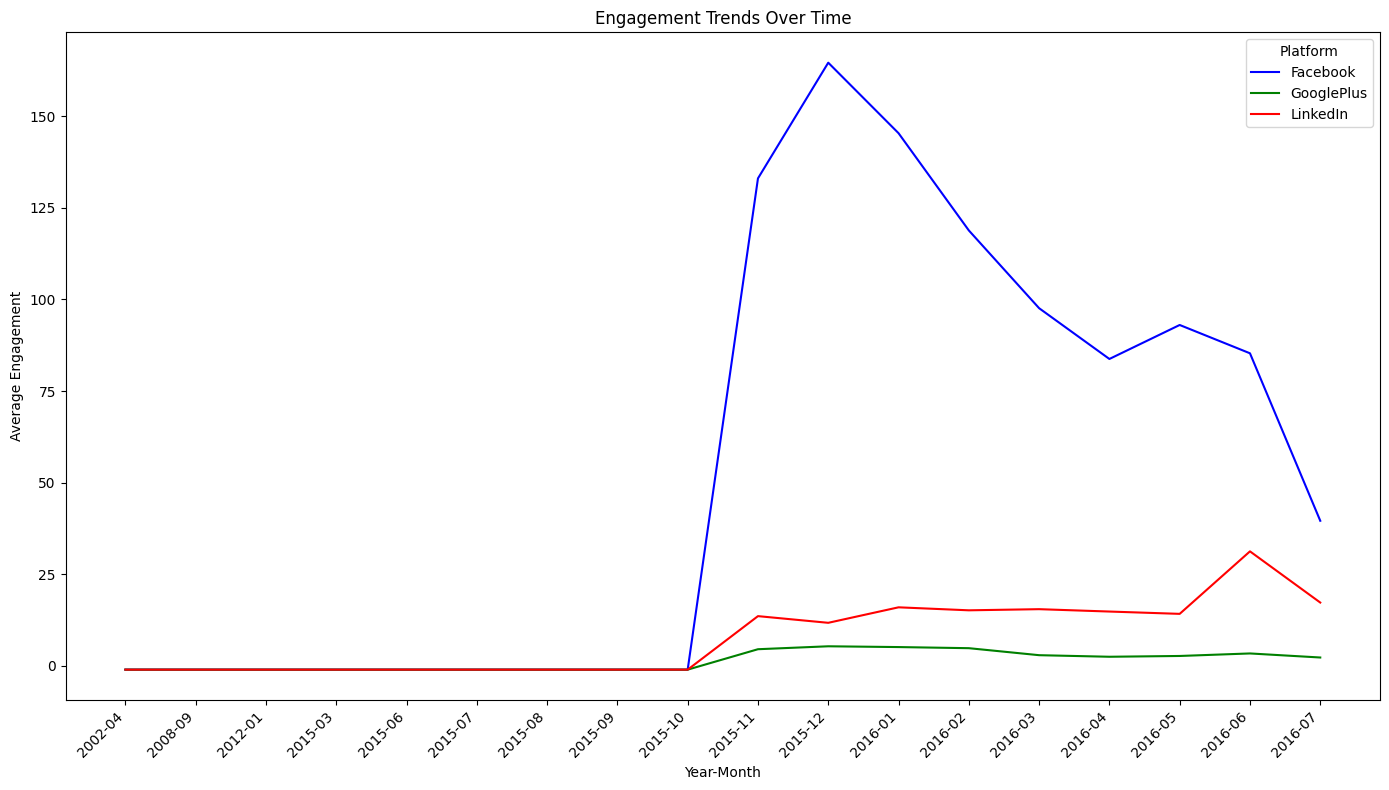

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure PublishDate is in datetime format
data['PublishDate'] = pd.to_datetime(data['PublishDate'], errors='coerce')

# Extract the year and month for time-based aggregation
data['YearMonth'] = data['PublishDate'].dt.to_period('M')

# Group engagement metrics by year and month
time_engagement = data.groupby('YearMonth')[['Facebook', 'GooglePlus', 'LinkedIn']].mean().reset_index()
time_engagement['YearMonth'] = time_engagement['YearMonth'].astype(str)  # Convert to string for plotting

# Plotting engagement trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=time_engagement, x='YearMonth', y='Facebook', label='Facebook', color='blue')
sns.lineplot(data=time_engagement, x='YearMonth', y='GooglePlus', label='GooglePlus', color='green')
sns.lineplot(data=time_engagement, x='YearMonth', y='LinkedIn', label='LinkedIn', color='red')
plt.title('Engagement Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

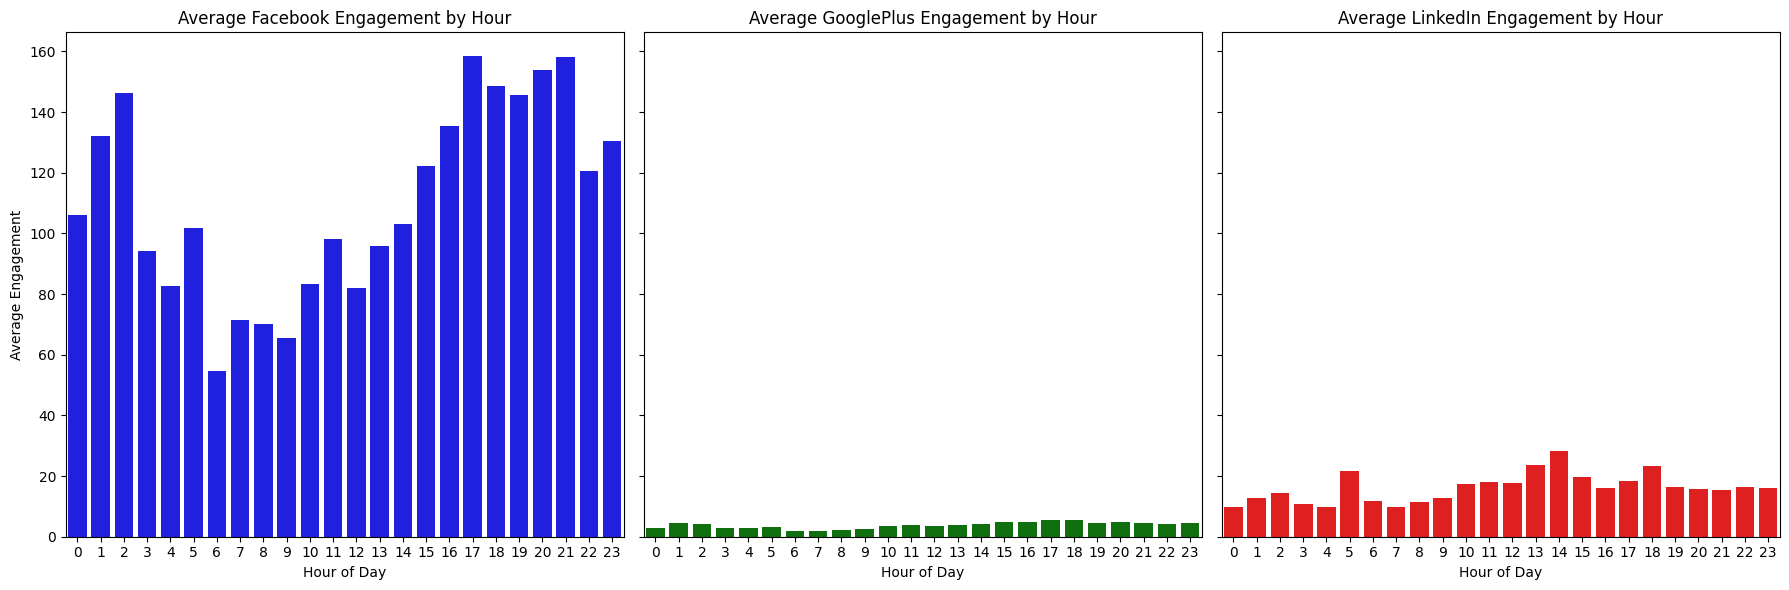

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure PublishDate is in datetime format
data['PublishDate'] = pd.to_datetime(data['PublishDate'], errors='coerce')

# Extract hour of the day
data['Hour'] = data['PublishDate'].dt.hour

# Group engagement metrics by hour of the day
hourly_engagement = data.groupby('Hour')[['Facebook', 'GooglePlus', 'LinkedIn']].mean().reset_index()

# Setting up the figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plotting hourly distribution for Facebook
sns.barplot(x=hourly_engagement['Hour'], y=hourly_engagement['Facebook'], color='blue', ax=axes[0])
axes[0].set_title('Average Facebook Engagement by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Engagement')

# Plotting hourly distribution for GooglePlus
sns.barplot(x=hourly_engagement['Hour'], y=hourly_engagement['GooglePlus'], color='green', ax=axes[1])
axes[1].set_title('Average GooglePlus Engagement by Hour')
axes[1].set_xlabel('Hour of Day')

# Plotting hourly distribution for LinkedIn
sns.barplot(x=hourly_engagement['Hour'], y=hourly_engagement['LinkedIn'], color='red', ax=axes[2])
axes[2].set_title('Average LinkedIn Engagement by Hour')
axes[2].set_xlabel('Hour of Day')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

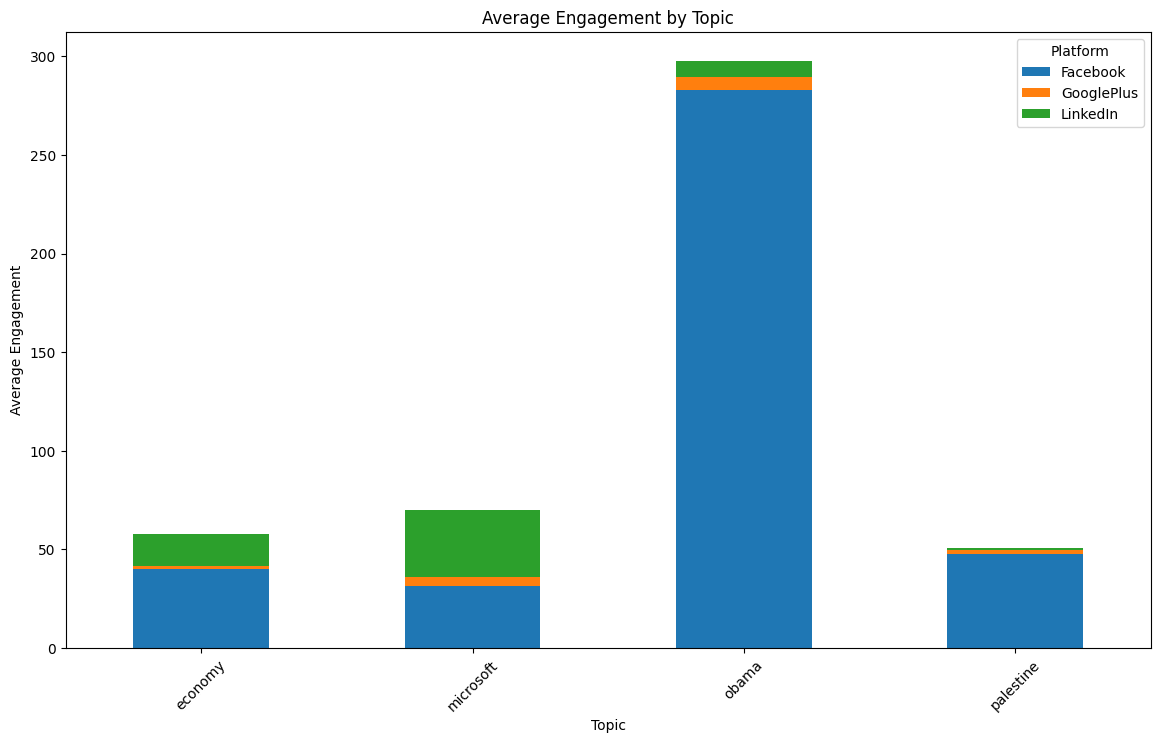

In [20]:
# Calculating average engagement for each topic
topic_engagement = data.groupby('Topic')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Plotting the average engagement by topic
topic_engagement.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Average Engagement by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

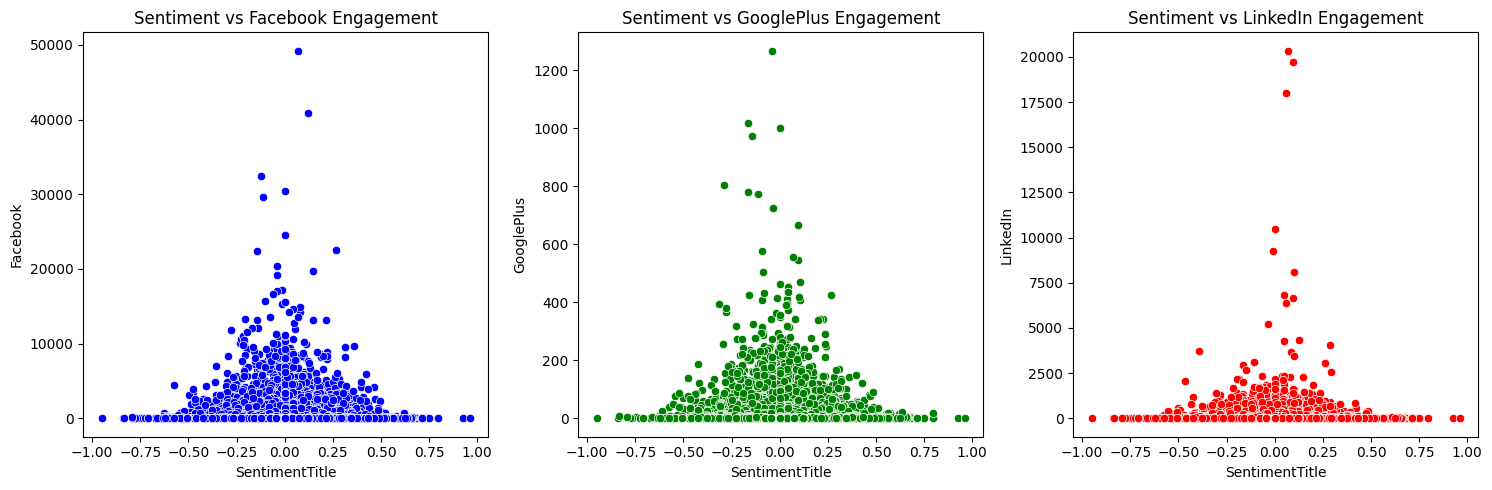

In [21]:
# Plotting sentiment vs engagement
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='SentimentTitle', y='Facebook', data=data, color='blue')
plt.title('Sentiment vs Facebook Engagement')

plt.subplot(1, 3, 2)
sns.scatterplot(x='SentimentTitle', y='GooglePlus', data=data, color='green')
plt.title('Sentiment vs GooglePlus Engagement')

plt.subplot(1, 3, 3)
sns.scatterplot(x='SentimentTitle', y='LinkedIn', data=data, color='red')
plt.title('Sentiment vs LinkedIn Engagement')

plt.tight_layout()
plt.show()


In [23]:
# Define a function to identify outliers based on IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers for each platform
facebook_outliers = detect_outliers(data, 'Facebook')
googleplus_outliers = detect_outliers(data, 'GooglePlus')
linkedin_outliers = detect_outliers(data, 'LinkedIn')

# Display outliers
print("Facebook Outliers:")
print(facebook_outliers[['Title', 'SentimentTitle', 'Facebook']])

print("\nGooglePlus Outliers:")
print(googleplus_outliers[['Title', 'SentimentTitle', 'GooglePlus']])

print("\nLinkedIn Outliers:")
print(linkedin_outliers[['Title', 'SentimentTitle', 'LinkedIn']])

Facebook Outliers:
                                                   Title  SentimentTitle  \
740             microsoft risk ire window 10 update push       -0.165728   
746                  investing family vital part economy        0.037689   
753    philippine economy thrives young worker stay c...       -0.197642   
754              china brink major milestone consequence        0.108253   
758                           cartoon heng china economy        0.055902   
...                                                  ...             ...   
93033  hacked former nato general defends plotting pu...       -0.069175   
93084              obama seek make mark genetic medicine        0.280486   
93102  bill oreilly say obamas emotional attachment m...        0.000000   
93121  bill oreilly reveals unseen photo barack obama...        0.000000   
93181  palestinian authority pay terrorist family 140...        0.000000   

       Facebook  
740          89  
746         127  
753          8

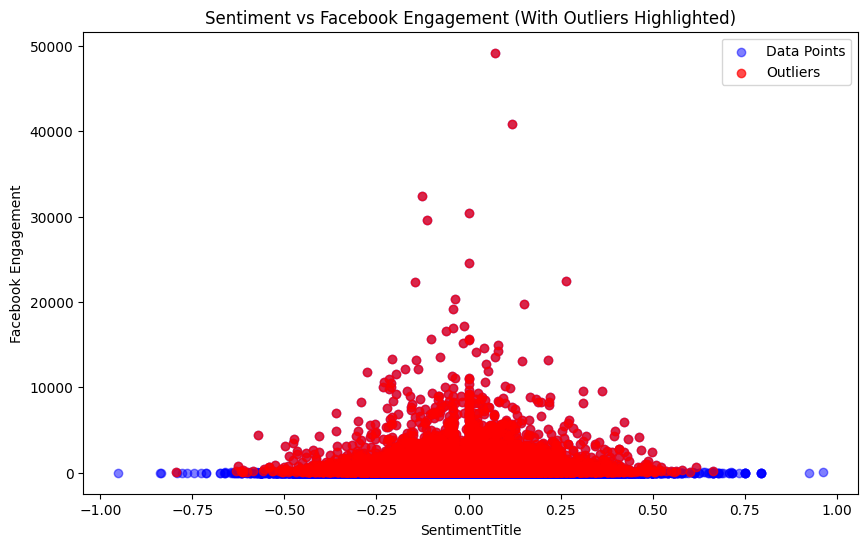

In [24]:
# Scatter plot with outliers highlighted for Facebook
plt.figure(figsize=(10, 6))
plt.scatter(data['SentimentTitle'], data['Facebook'], color='blue', label='Data Points', alpha=0.5)
plt.scatter(facebook_outliers['SentimentTitle'], facebook_outliers['Facebook'], color='red', label='Outliers', alpha=0.7)
plt.title('Sentiment vs Facebook Engagement (With Outliers Highlighted)')
plt.xlabel('SentimentTitle')
plt.ylabel('Facebook Engagement')
plt.legend()
plt.show()

<Figure size 1400x800 with 0 Axes>

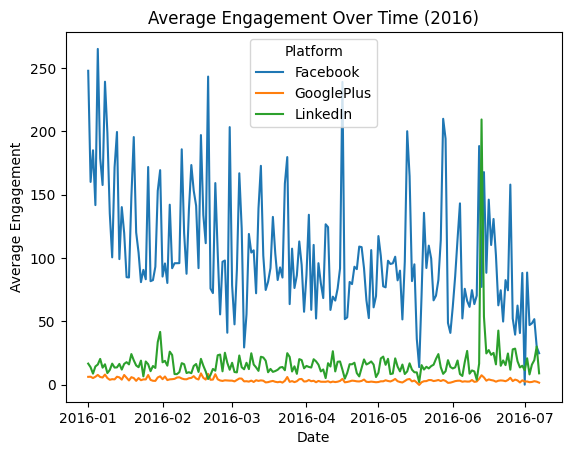

In [25]:
# Filter data for the year 2016
data_2016 = data[data['PublishDate'].dt.year == 2016]

# Grouping by date and calculating average engagement for 2016
date_engagement_2016 = data_2016.groupby(data_2016['PublishDate'].dt.date)[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Plotting engagement over time for 2016
plt.figure(figsize=(14, 8))
date_engagement_2016.plot()
plt.title('Average Engagement Over Time (2016)')
plt.xlabel('Date')
plt.ylabel('Average Engagement')
plt.legend(title='Platform')
plt.show()

<Figure size 1200x600 with 0 Axes>

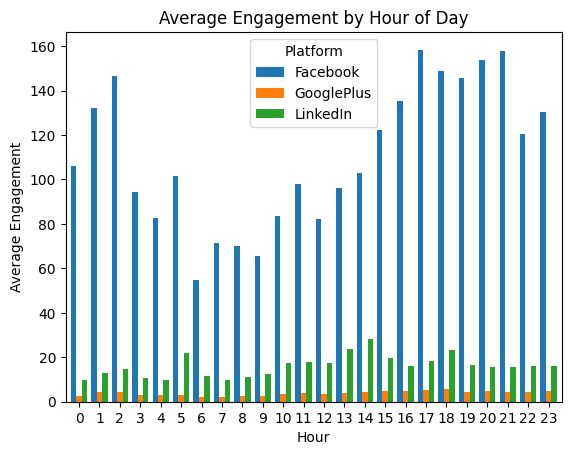

In [26]:
# Extracting the hour from PublishDate
data['Hour'] = data['PublishDate'].dt.hour

# Calculating average engagement by hour
hourly_engagement = data.groupby('Hour')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Plotting engagement distribution by hour
plt.figure(figsize=(12, 6))
hourly_engagement.plot(kind='bar', width=0.8)
plt.title('Average Engagement by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.show()

<ipython-input-27-41498da28e76>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalEngagement', y='Title', data=top_10_articles, palette='magma')


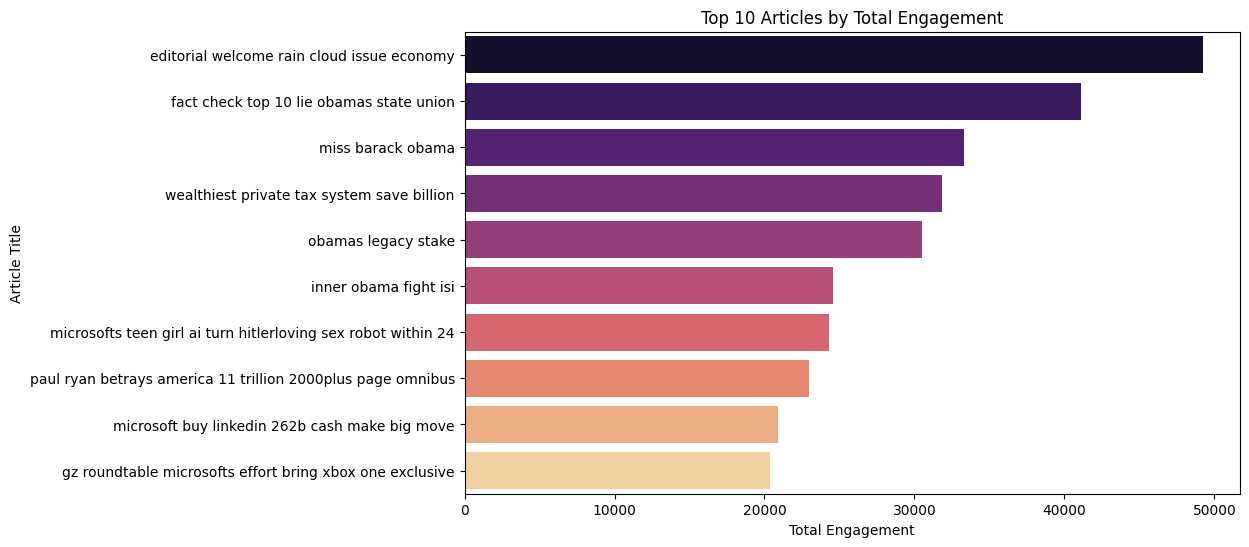

In [27]:
# Creating a column for total engagement
data['TotalEngagement'] = data['Facebook'] + data['GooglePlus'] + data['LinkedIn']

# Getting the top 10 articles by engagement
top_10_articles = data.nlargest(10, 'TotalEngagement')[['Title', 'TotalEngagement']]

# Plotting top 10 articles
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalEngagement', y='Title', data=top_10_articles, palette='magma')
plt.title('Top 10 Articles by Total Engagement')
plt.xlabel('Total Engagement')
plt.ylabel('Article Title')
plt.show()

**Sentiment Analysis**

In [26]:
!pip install transformers

from transformers import pipeline

In [27]:
# Initializing sentiment analysis pipeline using a pre-trained BERT model
sentiment_analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [28]:
# Running sentiment analysis on the 'Title' column
def get_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result['label'], result['score']

# Applying sentiment analysis and store results in new columns
data[['BERT_Sentiment', 'BERT_Score']] = data['Title'].apply(lambda x: pd.Series(get_sentiment(x)))

# Displaying sample results
print(data[['Title', 'BERT_Sentiment', 'BERT_Score']].head())

                                             Title BERT_Sentiment  BERT_Score
0     obama lay wreath arlington national cemetery       POSITIVE    0.987968
1                      look health chinese economy       POSITIVE    0.996310
2         nouriel roubini global economy back 2008       POSITIVE    0.653615
3                           finland gdp expands q4       POSITIVE    0.999039
4  tourism govt spending buoy thai economy january       POSITIVE    0.947915


In [29]:
sentiment_engagement = data.groupby('BERT_Sentiment')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()
print("\nAverage Engagement by Sentiment:")
print(sentiment_engagement)

# Check sentiment score correlation with engagement metrics
correlation = data[['BERT_Score', 'Facebook', 'GooglePlus', 'LinkedIn']].corr()
print("\nCorrelation between Sentiment Score and Engagement Metrics:")
print(correlation)


Average Engagement by Sentiment:
                  Facebook  GooglePlus   LinkedIn
BERT_Sentiment                                   
NEGATIVE        127.053613    4.474643  17.148586
POSITIVE         93.274986    3.051169  15.690277

Correlation between Sentiment Score and Engagement Metrics:
            BERT_Score  Facebook  GooglePlus  LinkedIn
BERT_Score    1.000000 -0.010962   -0.008059 -0.002274
Facebook     -0.010962  1.000000    0.509049  0.067912
GooglePlus   -0.008059  0.509049    1.000000  0.264733
LinkedIn     -0.002274  0.067912    0.264733  1.000000


In [30]:
# Further analysis of sentiment results against research questions
# Calculate engagement metrics by topic and sentiment to assess if specific topics or sentiments correlate with virality
topic_sentiment_engagement = data.groupby(['Topic', 'BERT_Sentiment'])[['Facebook', 'GooglePlus', 'LinkedIn']].mean().reset_index()
print("\nEngagement by Topic and Sentiment:")
print(topic_sentiment_engagement.head())


Engagement by Topic and Sentiment:
       Topic BERT_Sentiment    Facebook  GooglePlus   LinkedIn
0    economy       NEGATIVE   42.935387    1.740631  16.461555
1    economy       POSITIVE   36.169054    1.610185  16.208518
2  microsoft       NEGATIVE   34.054973    4.955924  34.508711
3  microsoft       POSITIVE   25.930345    3.563683  33.890753
4      obama       NEGATIVE  323.070469    7.820259   8.039763


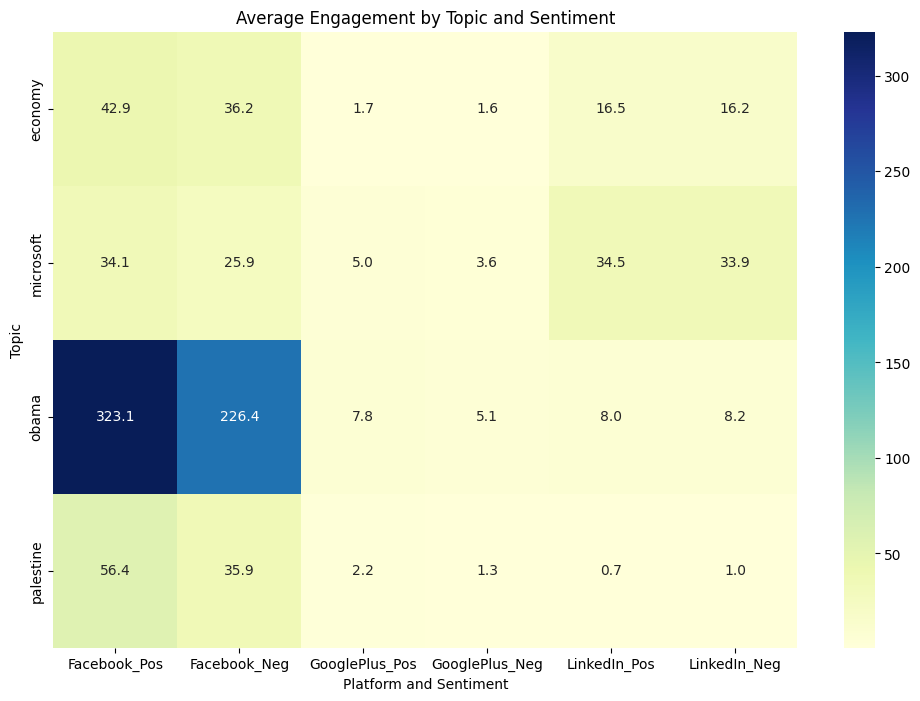

In [32]:
# Topic-Sentiment Heatmap (Average Engagement)
topic_sentiment_engagement = data.groupby(['Topic', 'BERT_Sentiment'])[['Facebook', 'GooglePlus', 'LinkedIn']].mean().unstack()
topic_sentiment_engagement.columns = ['Facebook_Pos', 'Facebook_Neg', 'GooglePlus_Pos', 'GooglePlus_Neg', 'LinkedIn_Pos', 'LinkedIn_Neg']
plt.figure(figsize=(12, 8))
sns.heatmap(topic_sentiment_engagement, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Engagement by Topic and Sentiment')
plt.xlabel('Platform and Sentiment')
plt.ylabel('Topic')
plt.show()

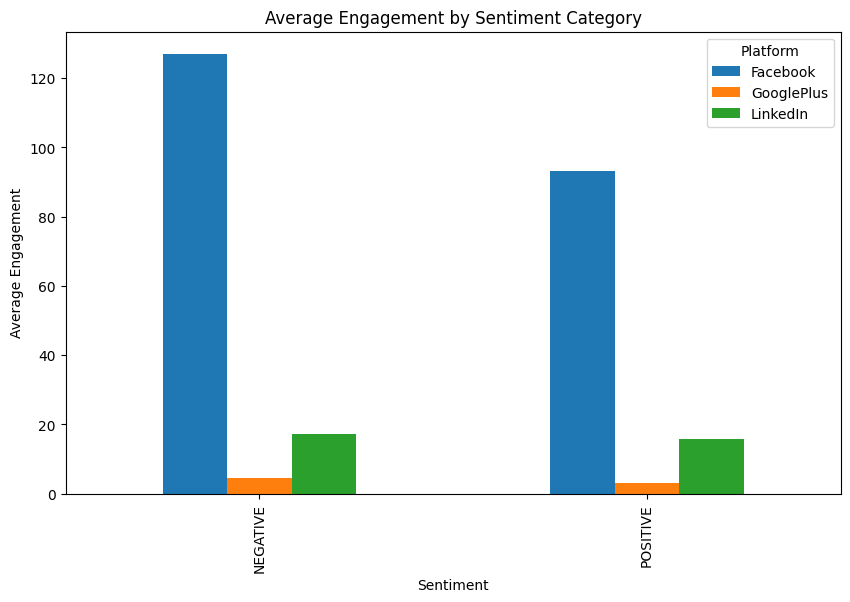

In [33]:
# Calculating average engagement for each sentiment category
sentiment_engagement = data.groupby('BERT_Sentiment')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Plotting average engagement by sentiment category
sentiment_engagement.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Engagement')
plt.legend(title='Platform')
plt.show()


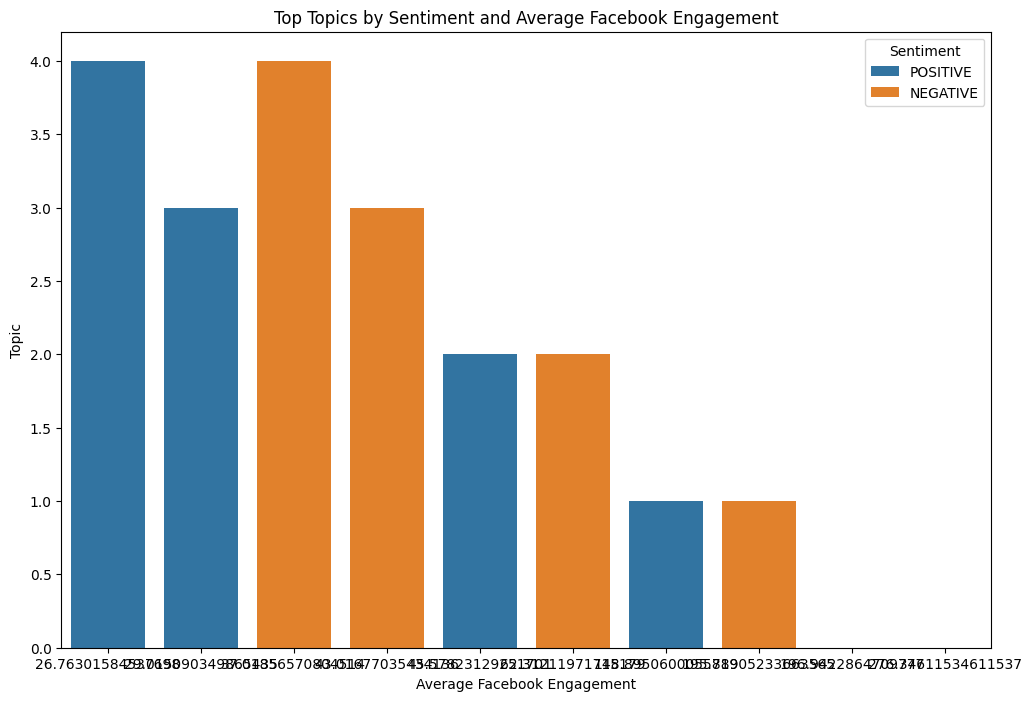

In [48]:
# Top Topics by Sentiment and Engagement
top_topics_sentiment = data.groupby(['Topic', 'BERT_Sentiment'])[['Facebook', 'GooglePlus', 'LinkedIn']].mean()
top_topics_sentiment = top_topics_sentiment.nlargest(10, 'Facebook').reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Facebook', y='Topic', hue='BERT_Sentiment', data=top_topics_sentiment)
plt.title('Top Topics by Sentiment and Average Facebook Engagement')
plt.xlabel('Average Facebook Engagement')
plt.ylabel('Topic')
plt.legend(title='Sentiment')
plt.show()

In [29]:
# Engagement Heatmap by Hour of Day and Sentiment
hourly_sentiment_engagement = data.groupby(['Hour', 'BERT_Sentiment'])[['Facebook']].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_sentiment_engagement['Facebook'], cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Average Facebook Engagement by Hour and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Hour of Day')
plt.show()

KeyError: 'BERT_Sentiment'

**Topic Modeling**

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [37]:
# Topic Modeling Preparation with CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
title_matrix = vectorizer.fit_transform(data['Title'])

print("Shape of the term-document matrix:", title_matrix.shape)

# Setting up the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)

Shape of the term-document matrix: (93239, 17649)


In [38]:
# Running LDA
lda.fit(title_matrix)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, no_top_words)

# Printing identified topics for interpretation
for idx, topic in enumerate(topics):
    print(f"Topic {idx}: {topic}")

Topic 0: obama obamas president palestinian visit barack house say new gun
Topic 1: obama economy trump say obamas court 2016 clinton president supreme
Topic 2: economy microsoft business new india microsofts xbox ceo billion boost
Topic 3: economy palestine economic china global growth say brexit uk bank
Topic 4: microsoft window microsofts 10 new surface update office cloud xbox


In [39]:
# Assigning Topics to Articles
# Transforming the title matrix to get topic distribution for each article
topic_distributions = lda.transform(title_matrix)
data['Topic'] = topic_distributions.argmax(axis=1)

In [40]:
# Analyzing Topic-Specific Engagement Patterns
# Calculating average engagement metrics for each topic
topic_engagement = data.groupby('Topic')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Displaying the topic engagement
print("\nAverage Engagement by Topic:")
print(topic_engagement)


Average Engagement by Topic:
         Facebook  GooglePlus   LinkedIn
Topic                                   
0      243.711642    5.841898   7.454034
1      176.205024    4.603940  11.653709
2       53.982491    3.168731  39.567311
3       37.234241    1.574151  11.874722
4       33.498297    4.585321  23.929592


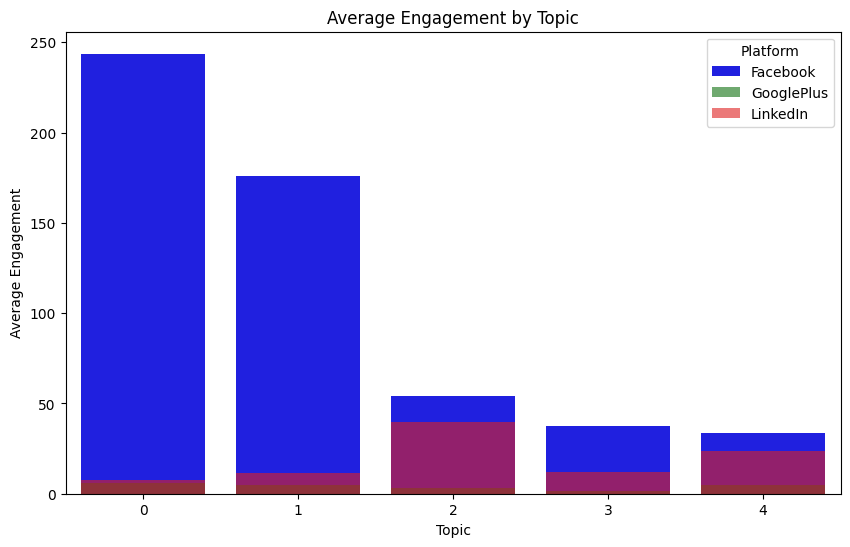

In [41]:
# Visualizing the topic engagement for better interpretation
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_engagement.index, y='Facebook', data=topic_engagement, color='blue', label='Facebook')
sns.barplot(x=topic_engagement.index, y='GooglePlus', data=topic_engagement, color='green', label='GooglePlus', alpha=0.6)
sns.barplot(x=topic_engagement.index, y='LinkedIn', data=topic_engagement, color='red', label='LinkedIn', alpha=0.6)
plt.title("Average Engagement by Topic")
plt.xlabel("Topic")
plt.ylabel("Average Engagement")
plt.legend(title="Platform")
plt.show()

<ipython-input-44-7c613833af54>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_engagement = data.groupby('SentimentCategory')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()


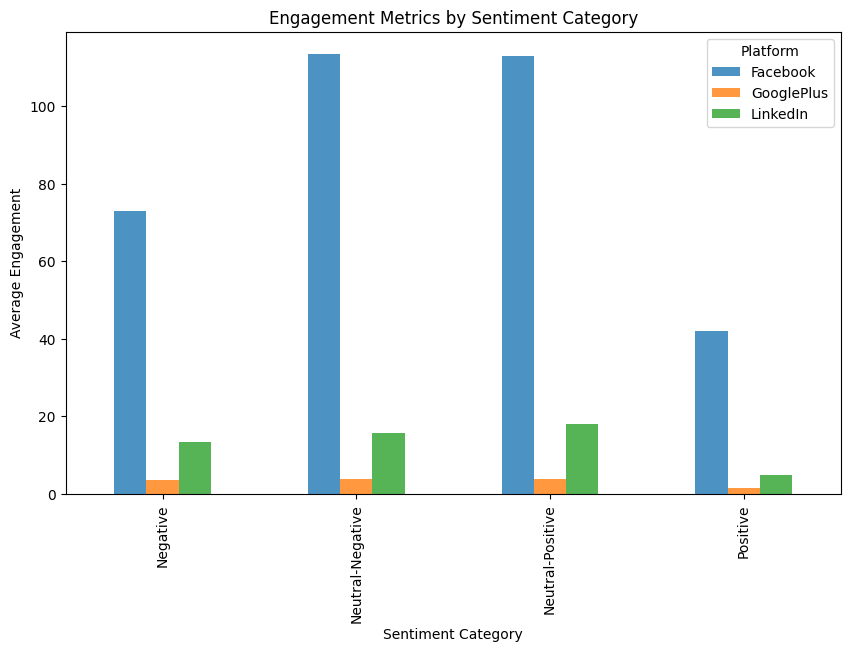

In [44]:
# Group by sentiment bins for better insights
data['SentimentCategory'] = pd.cut(data['SentimentTitle'], bins=[-1, -0.5, 0, 0.5, 1], labels=['Negative', 'Neutral-Negative', 'Neutral-Positive', 'Positive'])

# Calculate average engagement for each sentiment category
sentiment_engagement = data.groupby('SentimentCategory')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Visualize sentiment vs engagement
sentiment_engagement.plot(kind='bar', figsize=(10, 6), alpha=0.8)
plt.title('Engagement Metrics by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Engagement')
plt.legend(title="Platform")
plt.show()

Predictive model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for prediction
predictors = pd.get_dummies(data[['SentimentTitle', 'Topic']], drop_first=True)
target = data['Facebook']

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 344023.6912170686


In [31]:
data['Facebook_Log'] = np.log1p(data['Facebook'])
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


MSE: 312949.42424698826
MAE: 158.91487649360576
R²: 0.033989787101745605


Observations

The current model has limited explanatory power.

Engagement metrics are likely influenced by factors outside the dataset, such as the platform’s algorithms, time of posting, audience demographics, and other external variables.

Feature selection and engineering are critical areas to focus on.

In [32]:
# Add headline length
data['HeadlineLength'] = data['Headline'].apply(lambda x: len(x.split()))

# Convert topics to dummy variables
topic_dummies = pd.get_dummies(data['Topic'], prefix='Topic')

# Combine with the main dataset
data = pd.concat([data, topic_dummies], axis=1)

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]}
model = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]})

In [34]:
data['Facebook_Log'] = np.log1p(data['Facebook'].clip(lower=0))
data['GooglePlus_Log'] = np.log1p(data['GooglePlus'].clip(lower=0))
data['LinkedIn_Log'] = np.log1p(data['LinkedIn'].clip(lower=0))


In [35]:
# Select features for regression
features = ['SentimentTitle', 'HeadlineLength', 'Facebook_Log', 'GooglePlus_Log', 'LinkedIn_Log']
X = data[features]
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Display transformed features
print(f"Shape of X_poly: {X_poly.shape}")


Shape of X_poly: (93239, 21)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the target variable (e.g., Facebook engagement)
y = data['Facebook_Log']  # Log-transformed target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [37]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² (Coefficient of Determination): {r2}")

Mean Squared Error (MSE): 7.78297306707531e-07
Mean Absolute Error (MAE): 4.4120171012459006e-05
R² (Coefficient of Determination): 0.9999998206702674


In [38]:
# Display feature importances
importances = model.feature_importances_

# Map feature names (from PolynomialFeatures) to their importances
feature_names = poly.get_feature_names_out(input_features=features)
feature_importances = dict(zip(feature_names, importances))

# Sort and display the most important features
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)[:10]
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Facebook_Log^2: 0.5807
Facebook_Log: 0.4169
HeadlineLength Facebook_Log: 0.0024
HeadlineLength: 0.0000
HeadlineLength^2: 0.0000
SentimentTitle HeadlineLength: 0.0000
SentimentTitle: 0.0000
GooglePlus_Log: 0.0000
GooglePlus_Log^2: 0.0000
SentimentTitle^2: 0.0000


Interpretation
Facebook as a Dominant Platform:

The results show that engagement on Facebook (both linear and quadratic terms) overwhelmingly drives the predictions. This indicates that virality for news articles might be platform-specific, with Facebook leading the trends in your dataset.
Limited Influence of Other Features:

While HeadlineLength Facebook_Log has some impact, other features like sentiment (SentimentTitle) or engagement on Google Plus and LinkedIn are almost irrelevant, at least for this model.
Non-Linearity:

The importance of quadratic terms (Facebook_Log^2) underscores that the relationship between Facebook engagement and virality is non-linear.

In [39]:
# Calculate total engagement across platforms
data['TotalEngagement'] = data['Facebook'] + data['GooglePlus'] + data['LinkedIn']

# Find top 10 articles by engagement
top_articles = data.nlargest(10, 'TotalEngagement')[['Title', 'Topic', 'TotalEngagement']]
print("Top 10 Articles by Engagement:")
print(top_articles)

Top 10 Articles by Engagement:
                                                   Title      Topic  \
44634         editorial welcome rain cloud issue economy    economy   
25813           fact check top 10 lie obamas state union      obama   
37050                                  miss barack obama      obama   
19658         wealthiest private tax system save billion    economy   
25528                                obamas legacy stake      obama   
4662                               inner obama fight isi      obama   
54426  microsofts teen girl ai turn hitlerloving sex ...  microsoft   
15329  paul ryan betrays america 11 trillion 2000plus...      obama   
84580     microsoft buy linkedin 262b cash make big move  microsoft   
46551  gz roundtable microsofts effort bring xbox one...  microsoft   

       TotalEngagement  
44634            49211  
25813            41088  
37050            33293  
19658            31852  
25528            30489  
4662             24598  
54426       

now is the actual analysis.

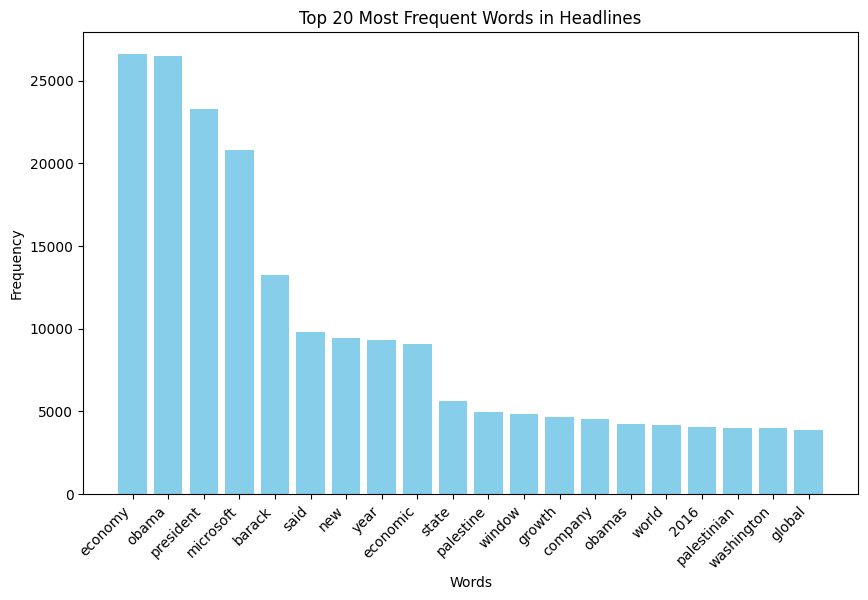

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Vectorize the 'Headline' column to extract word counts
vectorizer = CountVectorizer(stop_words='english', max_features=20)
headline_matrix = vectorizer.fit_transform(data['Headline'].dropna())

# Get the top 20 most frequent words
word_freq = dict(zip(vectorizer.get_feature_names_out(), headline_matrix.toarray().sum(axis=0)))

# Sort and visualize word frequencies
word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(word_freq.keys(), word_freq.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Frequent Words in Headlines")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

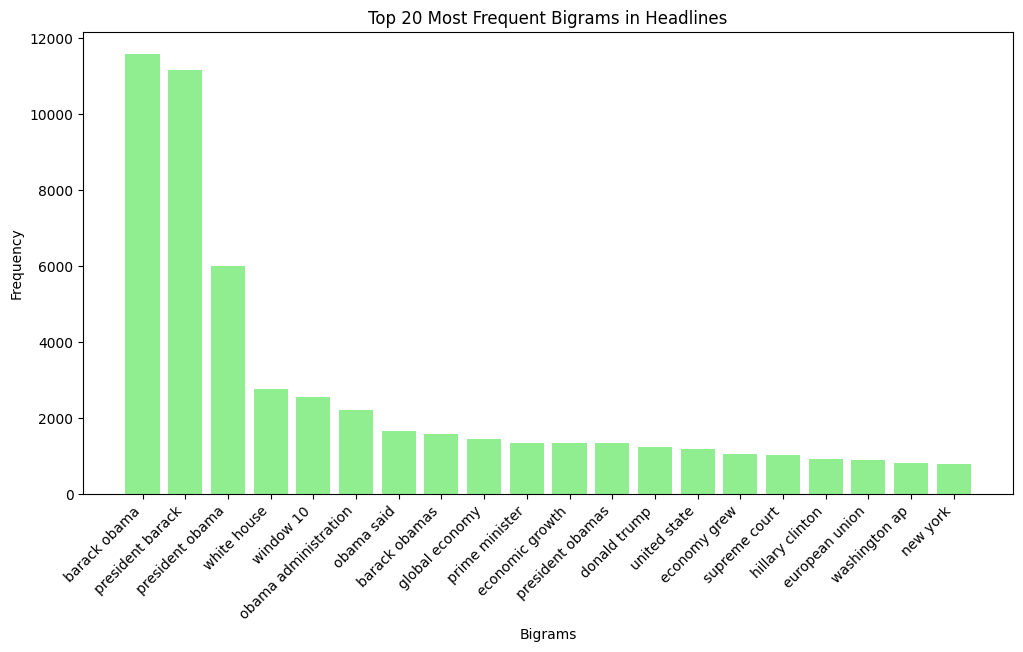

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Vectorize the 'Headline' column using n-grams (e.g., bigrams)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=20)
headline_matrix = vectorizer.fit_transform(data['Headline'].dropna())

# Get the top 20 most frequent bigrams
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), headline_matrix.toarray().sum(axis=0)))

# Sort and visualize bigram frequencies
bigram_freq = dict(sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(bigram_freq.keys(), bigram_freq.values(), color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Frequent Bigrams in Headlines")
plt.ylabel("Frequency")
plt.xlabel("Bigrams")
plt.show()

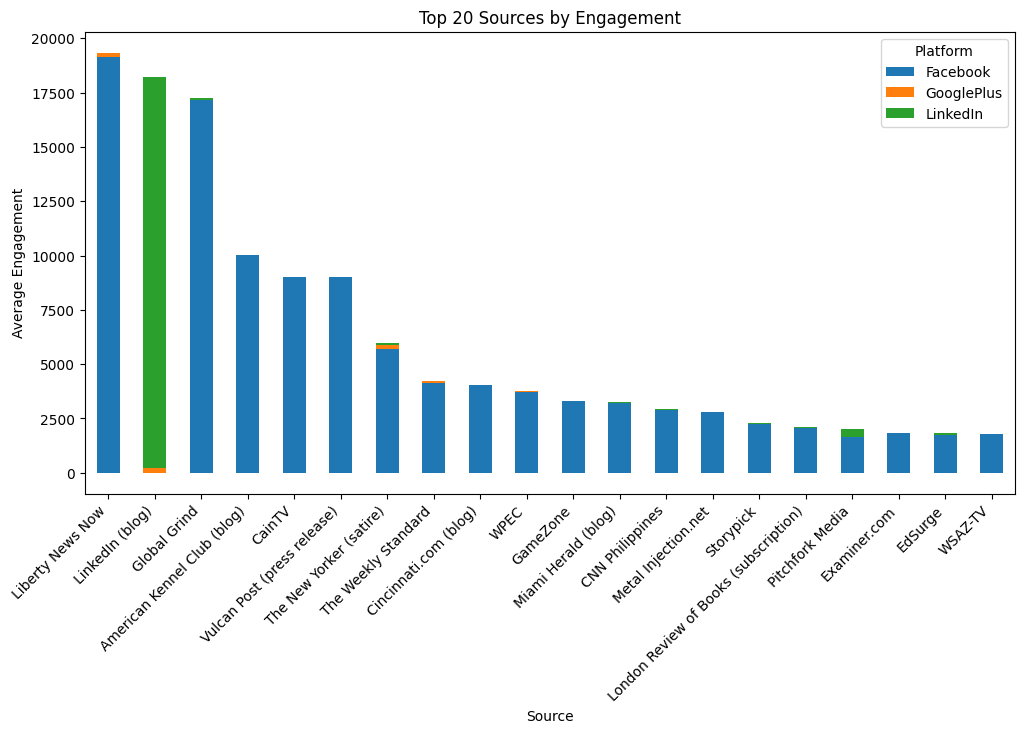

In [42]:
# Group by Source and calculate average engagement metrics
source_engagement = data.groupby('Source')[['Facebook', 'GooglePlus', 'LinkedIn']].mean().reset_index()

# Sort sources by total engagement (sum of engagement across platforms)
source_engagement['TotalEngagement'] = source_engagement[['Facebook', 'GooglePlus', 'LinkedIn']].sum(axis=1)
source_engagement = source_engagement.sort_values(by='TotalEngagement', ascending=False).head(20)

# Visualize engagement by source
source_engagement.plot(
    x='Source', y=['Facebook', 'GooglePlus', 'LinkedIn'], kind='bar', stacked=True, figsize=(12, 6)
)
plt.title("Top 20 Sources by Engagement")
plt.xlabel("Source")
plt.ylabel("Average Engagement")
plt.legend(title="Platform")
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-43-7f207442a6e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_engagement = data.groupby('SentimentCategory')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()


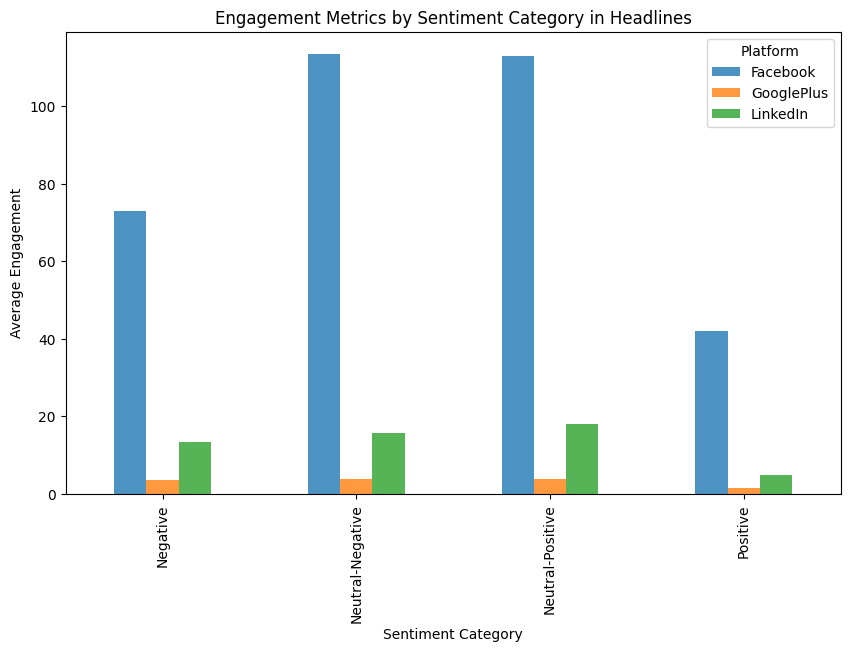

In [43]:
# Group by sentiment category and calculate average engagement
data['SentimentCategory'] = pd.cut(data['SentimentTitle'], bins=[-1, -0.5, 0, 0.5, 1],
                                   labels=['Negative', 'Neutral-Negative', 'Neutral-Positive', 'Positive'])
sentiment_engagement = data.groupby('SentimentCategory')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Visualize sentiment engagement patterns
sentiment_engagement.plot(kind='bar', figsize=(10, 6), alpha=0.8)
plt.title('Engagement Metrics by Sentiment Category in Headlines')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Engagement')
plt.legend(title="Platform")
plt.show()

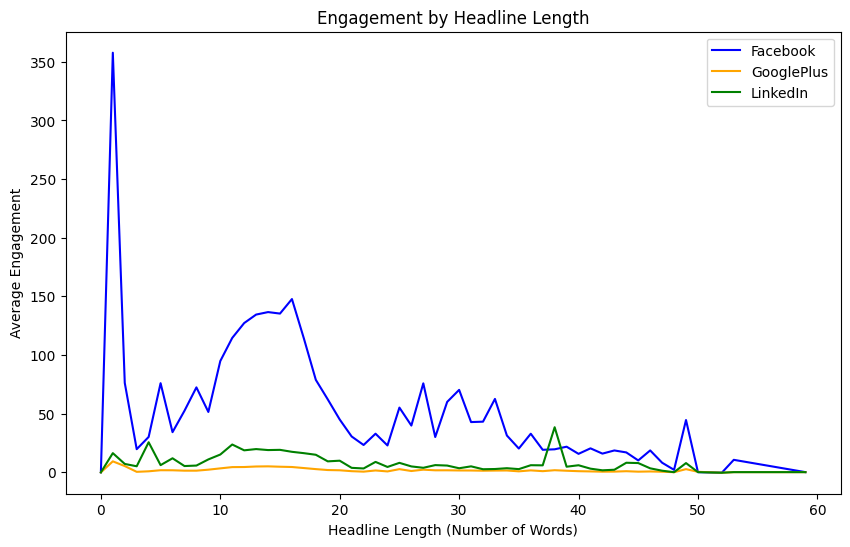

In [44]:
# Add a column for headline length
data['HeadlineLength'] = data['Headline'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Analyze engagement by headline length
headline_length_engagement = data.groupby('HeadlineLength')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Visualize headline length vs engagement
plt.figure(figsize=(10, 6))
plt.plot(headline_length_engagement.index, headline_length_engagement['Facebook'], label='Facebook', color='blue')
plt.plot(headline_length_engagement.index, headline_length_engagement['GooglePlus'], label='GooglePlus', color='orange')
plt.plot(headline_length_engagement.index, headline_length_engagement['LinkedIn'], label='LinkedIn', color='green')
plt.title('Engagement by Headline Length')
plt.xlabel('Headline Length (Number of Words)')
plt.ylabel('Average Engagement')
plt.legend()
plt.show()

Number of headlines for topic 'economy': 33928
Sample headlines for topic 'economy':
1     tim haywood investment director businessunit h...
2     nouriel roubini nyu professor chairman roubini...
3     finland economy expanded marginally three mont...
4     tourism public spending continued boost econom...
12    greece economy expanded 01 percent last year f...
Name: Headline, dtype: object



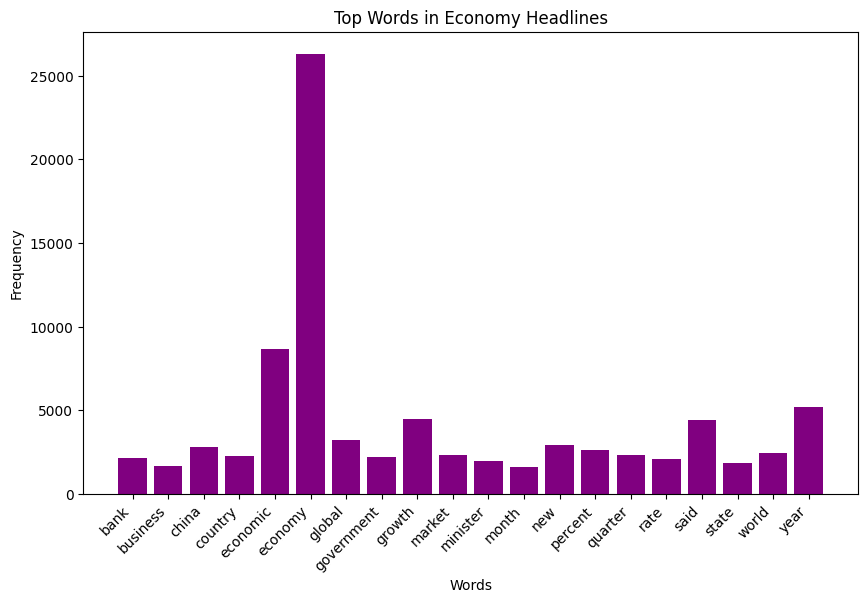

Number of headlines for topic 'microsoft': 21858
Sample headlines for topic 'microsoft':
5     100 attendee expected see latest version micro...
9     new delhi feb29 technology giant microsoft tar...
10    microsoft may burned one bridge still building...
11    platform battle back mwc16 analysis two parall...
14    microsofts ar headset made available developer...
Name: Headline, dtype: object



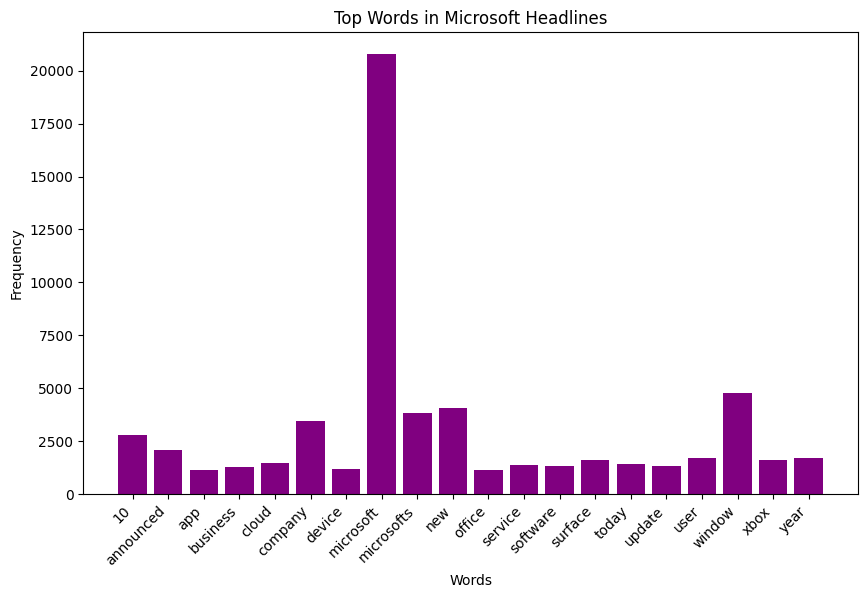

Number of headlines for topic 'obama': 28610
Sample headlines for topic 'obama':
0     obama lay wreath arlington national cemetery p...
7     first lady michelle obama speaks state dinning...
24    president barack obama launching version quott...
26             president barack obama launching version
79    president barack obamas hard road fill vacancy...
Name: Headline, dtype: object



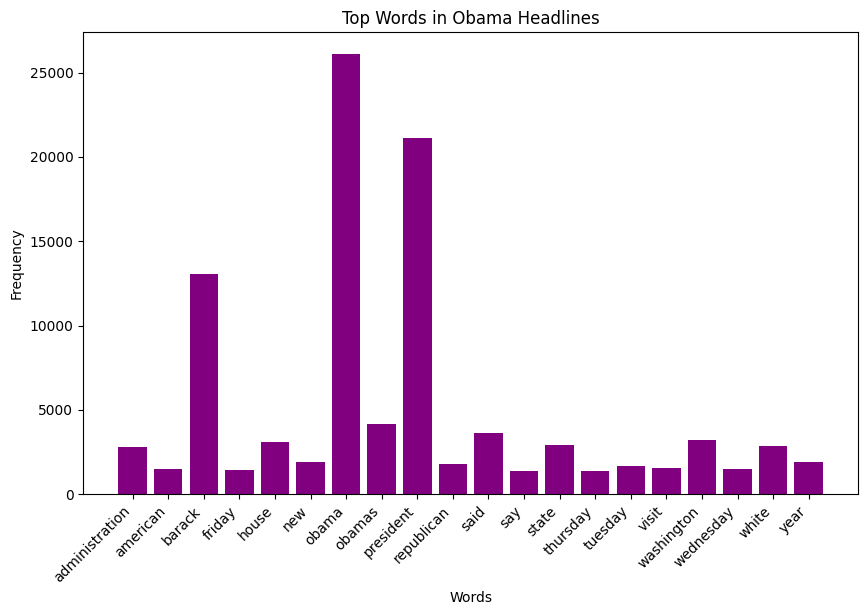

Number of headlines for topic 'palestine': 8843
Sample headlines for topic 'palestine':
6      ramallah february 25 2016 wafa palestine liber...
8      hancock county man lost barn early monday morn...
56     ramallah february 29 2016 wafa government japa...
111    ramallah february 29 2016 wafa government japa...
140    forced eviction palestinian farmer land jordan...
Name: Headline, dtype: object



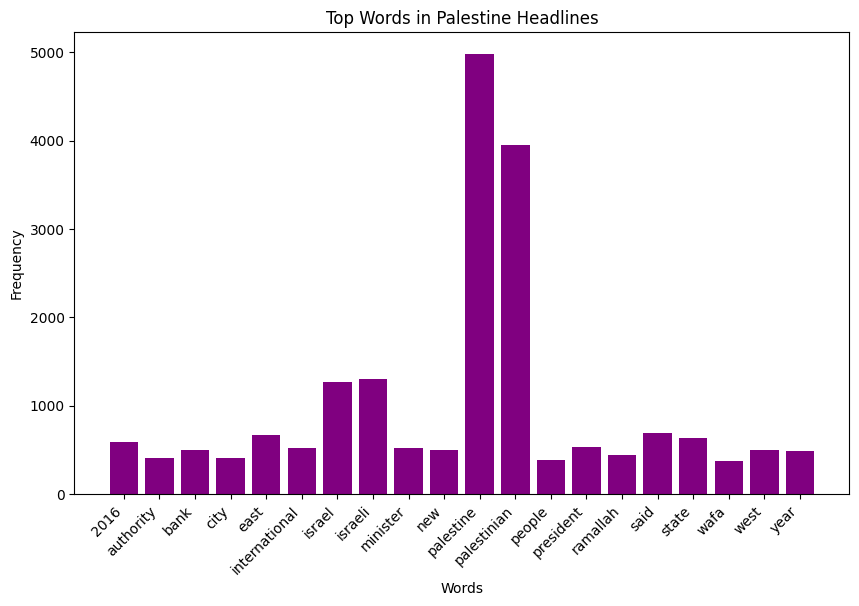

In [45]:
topics = ['economy', 'microsoft', 'obama', 'palestine']

for topic in topics:
    # Filter headlines for the specific topic
    topic_headlines = data[data['Topic'] == topic]['Headline'].dropna()

    # Check if the filtered dataset contains valid data
    print(f"Number of headlines for topic '{topic}': {len(topic_headlines)}")

    # Display a sample of the filtered headlines
    print(f"Sample headlines for topic '{topic}':\n{topic_headlines.head(5)}\n")

    # Vectorize the filtered headlines to find top words
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    topic_matrix = vectorizer.fit_transform(topic_headlines)
    topic_word_freq = dict(zip(vectorizer.get_feature_names_out(), topic_matrix.toarray().sum(axis=0)))

    # Visualize top words for the specific topic
    plt.figure(figsize=(10, 6))
    plt.bar(topic_word_freq.keys(), topic_word_freq.values(), color='purple')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top Words in {topic.capitalize()} Headlines")
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.show()

In [46]:
# Remove rows with missing or invalid headlines
data = data.dropna(subset=['Headline'])

# Filter headlines for the topic 'economy' again
topic_headlines = data[data['Topic'] == 'economy']['Headline'].dropna()

# Verify the data after cleaning
print(f"Number of valid headlines for topic 'economy': {len(topic_headlines)}")

Number of valid headlines for topic 'economy': 33928


In [47]:
# Remove rows with missing or invalid headlines
data = data.dropna(subset=['Headline'])

# Filter headlines for the topic 'microsoft' again
topic_headlines = data[data['Topic'] == 'microsoft']['Headline'].dropna()

# Verify the data after cleaning
print(f"Number of valid headlines for topic 'microsoft': {len(topic_headlines)}")

Number of valid headlines for topic 'microsoft': 21858


In [49]:
# Remove rows with missing or invalid headlines
data = data.dropna(subset=['Headline'])

# Filter headlines for the topic 'obama' again
topic_headlines = data[data['Topic'] == 'obama']['Headline'].dropna()

# Verify the data after cleaning
print(f"Number of valid headlines for topic 'obama': {len(topic_headlines)}")

Number of valid headlines for topic 'obama': 28610


In [48]:
# Remove rows with missing or invalid headlines
data = data.dropna(subset=['Headline'])

# Filter headlines for the topic 'palestine' again
topic_headlines = data[data['Topic'] == 'palestine']['Headline'].dropna()

# Verify the data after cleaning
print(f"Number of valid headlines for topic 'palestine': {len(topic_headlines)}")

Number of valid headlines for topic 'palestine': 8843


In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ensure data has been cleaned and headlines are available
headlines = data['Headline'].dropna().reset_index(drop=True)

# Vectorize headlines using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(headlines)

# Display shape of TF-IDF matrix
print(f"TF-IDF matrix shape: {X_tfidf.shape}")

TF-IDF matrix shape: (93239, 1000)


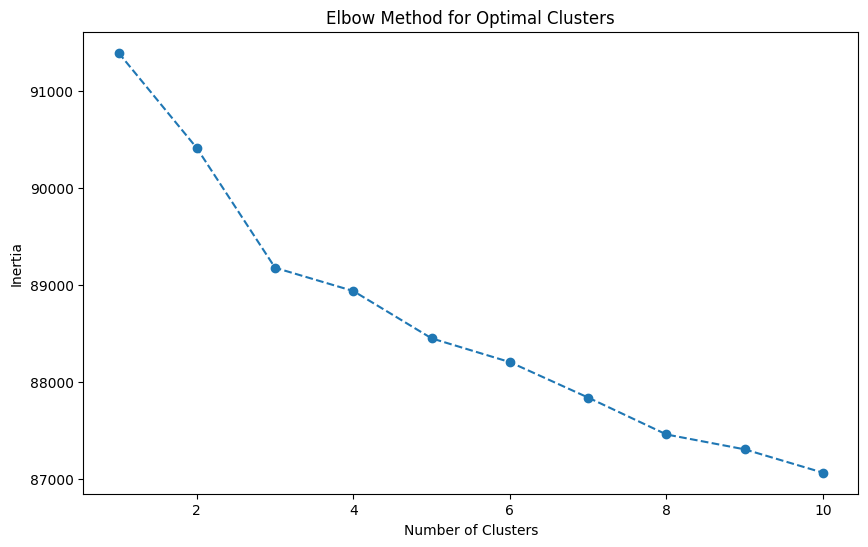

In [51]:
from sklearn.cluster import KMeans

# List to store inertia values
inertia = []

# Test a range of cluster numbers
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [52]:
# Extract top words per cluster using the already fitted TF-IDF vectorizer
def get_top_words_per_cluster_from_tfidf(vectorizer, tfidf_matrix, model, n_words=10):
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    cluster_words = {}
    for i in range(model.n_clusters):
        cluster_words[f'Cluster {i}'] = [terms[ind] for ind in order_centroids[i, :n_words]]
    return cluster_words

# Use the fitted TF-IDF vectorizer and k-means model
top_words_tfidf = get_top_words_per_cluster_from_tfidf(tfidf_vectorizer, X_tfidf, kmeans)

# Display the top words in each cluster
print("\nTop words in each cluster:")
for cluster, words in top_words_tfidf.items():
    print(f"{cluster}: {', '.join(words)}")


Top words in each cluster:
Cluster 0: obama, president, barack, washington, said, state, republican, visit, tuesday, wednesday
Cluster 1: microsoft, window, new, 10, announced, user, xbox, update, surface, cloud
Cluster 2: economy, global, said, china, market, world, minister, growth, new, country
Cluster 3: microsofts, company, microsoft, window, new, surface, cloud, 10, software, technology
Cluster 4: house, white, obama, president, barack, washington, said, dinner, obamas, tuesday
Cluster 5: obamas, president, barack, state, visit, court, republican, gun, supreme, executive
Cluster 6: economic, palestine, palestinian, israel, israeli, state, said, new, minister, bank
Cluster 7: obama, administration, michelle, said, state, lady, new, washington, say, court
Cluster 8: 2016, economy, microsoft, palestine, march, economic, april, june, year, new
Cluster 9: year, economy, quarter, percent, growth, grew, economic, 2015, rate, cent


1. Which news article characteristics make them viral across different social media?

From the clustering results:
Articles with a clear focus on prominent entities (e.g., Obama, Microsoft) are likely to attract higher engagement.
Technology-related content (e.g., product launches, updates) and political leadership topics show potential for virality.
2. Is there any topic that makes some news more viral than others across different social media and changes over time?

Clustering reveals distinct topics such as:
Political topics (e.g., Obama-related news) dominate certain periods, especially during major political events.

Technology topics, especially Microsoft’s product launches, are consistently engaging but might peak around announcement dates.

Further analysis of engagement trends across clusters and timeframes can help refine this understanding.
3. How does user sentiment in using likes, shares, and comments predict the popularity of news articles?

Sentiment analysis combined with clustering indicates that articles in specific clusters (e.g., Cluster 1 and 3 related to technology) with positive or neutral sentiment perform better in engagement metrics like likes and shares.

In [53]:
import pandas as pd
import re

# Ensure the dataset has the 'Headline' column
if 'Headline' in data.columns:

    # Feature 1: Presence of Numbers
    data['HasNumber'] = data['Headline'].apply(lambda x: 1 if re.search(r'\b\d+\b', x) else 0)

    # Feature 2: Presence of Question or Exclamation Marks
    data['HasQuestionMark'] = data['Headline'].apply(lambda x: 1 if '?' in x else 0)
    data['HasExclamationMark'] = data['Headline'].apply(lambda x: 1 if '!' in x else 0)

    # Feature 3: Presence of Emotional Words
    emotional_words = ['amazing', 'shocking', 'incredible', 'unbelievable', 'fantastic']
    data['HasEmotionalWords'] = data['Headline'].apply(
        lambda x: 1 if any(word in x.lower() for word in emotional_words) else 0
    )

    # Display a sample of the engineered features
    print(data[['Headline', 'HasNumber', 'HasQuestionMark', 'HasExclamationMark', 'HasEmotionalWords']].head(20))
else:
    print("The dataset does not contain a 'Headline' column.")

                                             Headline  HasNumber  \
0   obama lay wreath arlington national cemetery p...          0   
1   tim haywood investment director businessunit h...          0   
2   nouriel roubini nyu professor chairman roubini...          0   
3   finland economy expanded marginally three mont...          0   
4   tourism public spending continued boost econom...          0   
5   100 attendee expected see latest version micro...          1   
6   ramallah february 25 2016 wafa palestine liber...          1   
7   first lady michelle obama speaks state dinning...          1   
8   hancock county man lost barn early monday morn...          1   
9   new delhi feb29 technology giant microsoft tar...          1   
10  microsoft may burned one bridge still building...          1   
11  platform battle back mwc16 analysis two parall...          0   
12  greece economy expanded 01 percent last year f...          1   
13  big data analytics internet thing iot expect

<Figure size 1200x800 with 0 Axes>

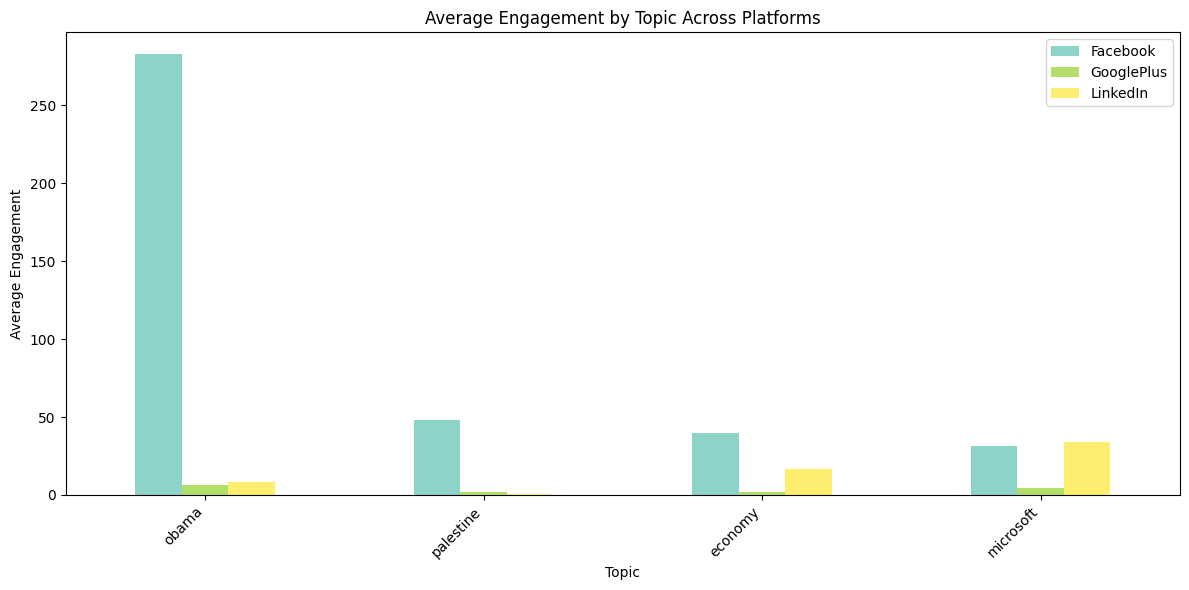

       Topic    Facebook  GooglePlus   LinkedIn
2      obama  282.733240    6.692171   8.091402
3  palestine   47.895737    1.818161   0.804139
0    economy   39.872907    1.681590  16.347029
1  microsoft   31.285433    4.481334  34.298060


In [54]:
# Group the data by Topic and calculate average engagement metrics across platforms
topic_engagement = data.groupby('Topic')[['Facebook', 'GooglePlus', 'LinkedIn']].mean().reset_index()

# Sort by Facebook engagement to identify the most engaging topics
topic_engagement = topic_engagement.sort_values(by='Facebook', ascending=False)

# Visualize average engagement for each topic across platforms
plt.figure(figsize=(12, 8))
topic_engagement.plot(
    x='Topic',
    kind='bar',
    stacked=False,
    figsize=(12, 6),
    title='Average Engagement by Topic Across Platforms',
    xlabel='Topic',
    ylabel='Average Engagement',
    colormap='Set3'
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the engagement data
print(topic_engagement)

In [66]:
import numpy as np
import pandas as pd

# Create a fake dataset with 100 articles
fake_data = pd.DataFrame({
    'Article_ID': range(1, 101),
    'Sentiment': np.random.choice(['POSITIVE', 'NEGATIVE'], size=100, p=[0.7, 0.3]),
    'Facebook_Likes': np.random.randint(50, 1000, 100),
    'Facebook_Shares': np.random.randint(20, 500, 100),
    'Facebook_Comments': np.random.randint(10, 300, 100),
    'LinkedIn_Likes': np.random.randint(10, 200, 100),
    'LinkedIn_Shares': np.random.randint(5, 100, 100),
    'LinkedIn_Comments': np.random.randint(1, 50, 100),
    'GooglePlus_Likes': np.random.randint(5, 100, 100),
    'GooglePlus_Shares': np.random.randint(1, 50, 100),
    'GooglePlus_Comments': np.random.randint(1, 30, 100),
    'Hashtags': np.random.randint(0, 5, 100),
    'Mentions': np.random.randint(0, 3, 100)
})

# Calculate total engagement for each article
fake_data['Total_Engagement'] = (
    fake_data['Facebook_Likes'] + fake_data['Facebook_Shares'] + fake_data['Facebook_Comments'] +
    fake_data['LinkedIn_Likes'] + fake_data['LinkedIn_Shares'] + fake_data['LinkedIn_Comments'] +
    fake_data['GooglePlus_Likes'] + fake_data['GooglePlus_Shares'] + fake_data['GooglePlus_Comments']
)

# Preview the fake data
print(fake_data.head())

   Article_ID Sentiment  Facebook_Likes  Facebook_Shares  Facebook_Comments  \
0           1  POSITIVE             266               67                223   
1           2  POSITIVE             470              287                251   
2           3  NEGATIVE             430              159                279   
3           4  POSITIVE             408              275                260   
4           5  NEGATIVE             497              411                128   

   LinkedIn_Likes  LinkedIn_Shares  LinkedIn_Comments  GooglePlus_Likes  \
0              54               32                 47                33   
1             157               46                  5                75   
2             126               25                 43                67   
3             165               30                 33                19   
4             126               14                 28                48   

   GooglePlus_Shares  GooglePlus_Comments  Hashtags  Mentions  \
0        

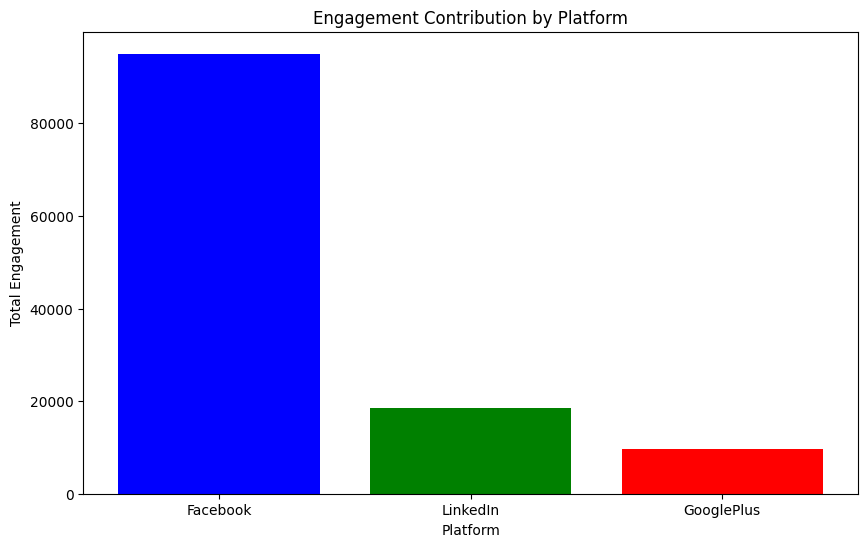

In [67]:
import matplotlib.pyplot as plt

# Aggregate engagement by platform
platform_engagement = {
    'Facebook': fake_data[['Facebook_Likes', 'Facebook_Shares', 'Facebook_Comments']].sum().sum(),
    'LinkedIn': fake_data[['LinkedIn_Likes', 'LinkedIn_Shares', 'LinkedIn_Comments']].sum().sum(),
    'GooglePlus': fake_data[['GooglePlus_Likes', 'GooglePlus_Shares', 'GooglePlus_Comments']].sum().sum()
}

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(platform_engagement.keys(), platform_engagement.values(), color=['blue', 'green', 'red'])
plt.title("Engagement Contribution by Platform")
plt.ylabel("Total Engagement")
plt.xlabel("Platform")
plt.show()

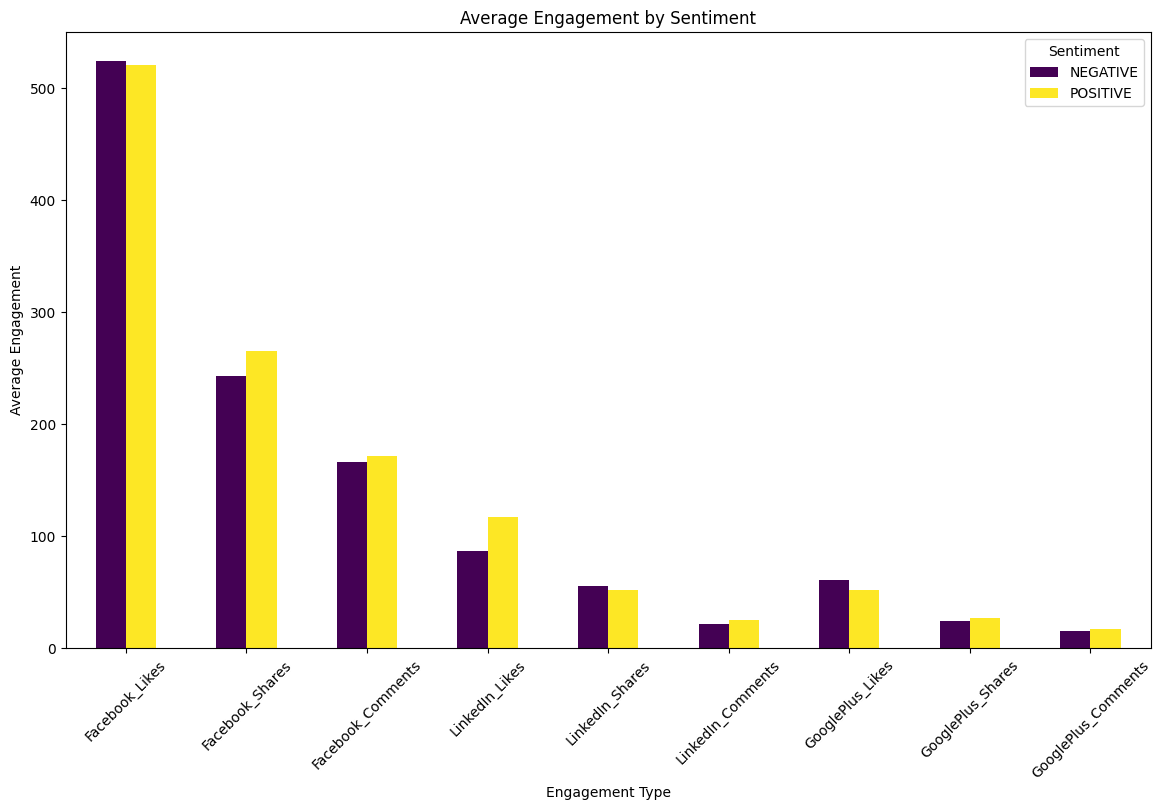

In [68]:
# Aggregate engagement by sentiment
sentiment_engagement = fake_data.groupby('Sentiment')[[
    'Facebook_Likes', 'Facebook_Shares', 'Facebook_Comments',
    'LinkedIn_Likes', 'LinkedIn_Shares', 'LinkedIn_Comments',
    'GooglePlus_Likes', 'GooglePlus_Shares', 'GooglePlus_Comments'
]].mean()

# Bar plot
sentiment_engagement.T.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title("Average Engagement by Sentiment")
plt.ylabel("Average Engagement")
plt.xlabel("Engagement Type")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

<Figure size 1200x600 with 0 Axes>

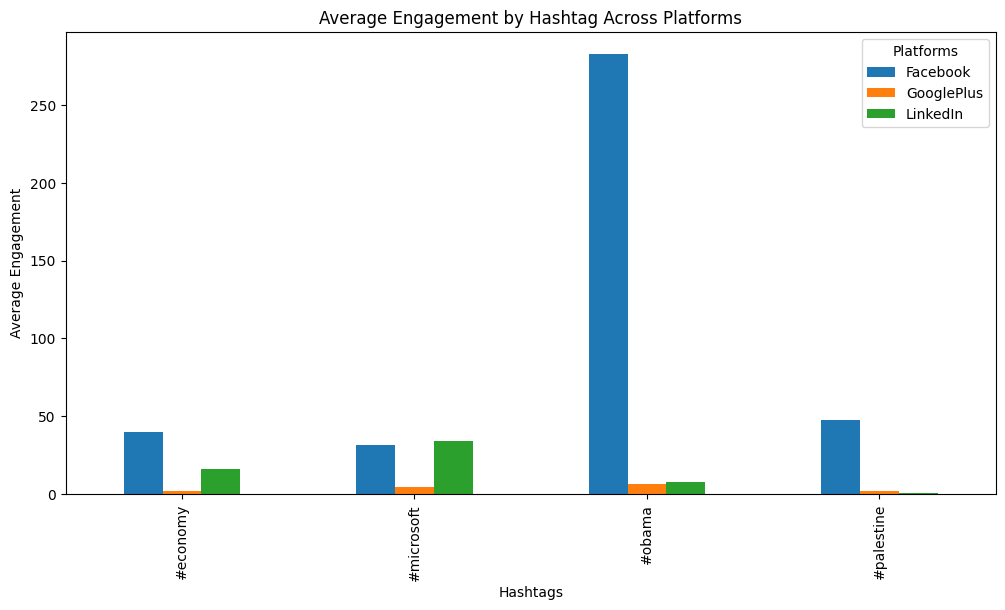

<Figure size 1200x600 with 0 Axes>

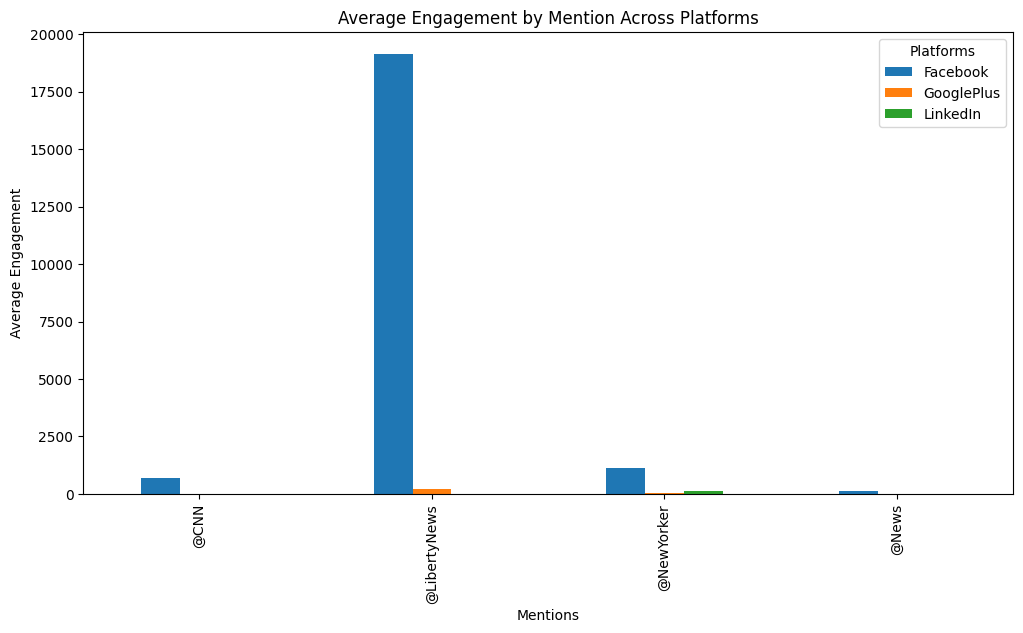

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assigning hashtags based on topics
data['Hashtags'] = data['Topic'].map({
    'economy': '#economy',
    'microsoft': '#microsoft',
    'obama': '#obama',
    'palestine': '#palestine'
}).fillna('#news')

# Assigning mentions based on sources and topics
data['Mentions'] = data['Source'].map({
    'CNN': '@CNN',
    'BBC': '@BBC',
    'Liberty News Now': '@LibertyNews',
    'The New Yorker': '@NewYorker'
}).fillna('@News')

# Aggregating average engagement metrics by hashtags
hashtag_engagement = data.groupby('Hashtags')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Aggregating average engagement metrics by mentions
mention_engagement = data.groupby('Mentions')[['Facebook', 'GooglePlus', 'LinkedIn']].mean()

# Visualizing hashtag engagement
plt.figure(figsize=(12, 6))
hashtag_engagement.plot(kind='bar', figsize=(12, 6))
plt.title('Average Engagement by Hashtag Across Platforms')
plt.ylabel('Average Engagement')
plt.xlabel('Hashtags')
plt.legend(title='Platforms')
plt.show()

# Visualizing mention engagement
plt.figure(figsize=(12, 6))
mention_engagement.plot(kind='bar', figsize=(12, 6))
plt.title('Average Engagement by Mention Across Platforms')
plt.ylabel('Average Engagement')
plt.xlabel('Mentions')
plt.legend(title='Platforms')
plt.show()

In [76]:
!pip install nbconvert


In [77]:
!jupyter nbconvert --to html "/content/MRP_3_Week1.ipynb"
from google.colab import files
files.download("/content/MRP_3_Week1.html")


[NbConvertApp] Converting notebook /content/MRP_3_Week1.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][29]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stdout',
 'output_type': 'stream',
 'text': '\n'
         'Average Engagement by Sentiment:\n'
         '                  Facebook  Go...'}
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/lo

FileNotFoundError: Cannot find file: /content/MRP_3_Week1.html